# ProPythia DNA quick start

In [28]:
%load_ext autoreload
%autoreload 2

import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Getting sequences

This module comprehends functions to read and to validate DNA sequences. First is necessary to create the object ReadDNA.

In [29]:
from read_sequence import ReadDNA
reader = ReadDNA()

It is possible to create sequence objects using a single DNA sequence, a *CSV* and a *FASTA* file. The single sequence is going to be validated (check if all letters belong to the DNA alphabet) and the output will be the sequence in upper case.

In [30]:
data = reader.read_sequence("ACGTACGAGCATGCAT")
print(data)

ACGTACGAGCATGCAT


With *CSV* there must be at least a column with the sequence in the file. The labels may also be retrieved and validated in this option and if the user wants them, he must specify the `with_label` parameter as **True** and the column with the labels must be named 'label'.

In [31]:
filename = "data/dataset.csv"
data = reader.read_csv(filename, with_labels=False)
print(data.head())
print(data.shape)

print("#" * 100)

data = reader.read_csv(filename, with_labels=True)
print(data.head())
print(data.shape)

                                            sequence
0  CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...
1  GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...
2  GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...
3  GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...
4  GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...
(2000, 1)
####################################################################################################
                                            sequence  label
0  CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...      0
1  GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...      0
2  GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...      0
3  GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...      1
4  GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...      1
(2000, 2)


The *FASTA* format is similar to the *CSV* format. It always reads the sequence, and the labels only if the user wants them. The *FASTA* format is must be one of the following examples:

```
>sequence_id1
ACTGACTGACTGACTGACTGACTGACTGACTGACTGACTG...
>sequence_id2
ACTGACTGACTGACTGACTGACTGACTGACTGACTGACTG...
``` 

```
>sequence_id1,label1
ACTGACTGACTGACTGACTGACTGACTGACTGACTGACTG...
>sequence_id2,label2
ACTGACTGACTGACTGACTGACTGACTGACTGACTGACTG...
``` 

In [32]:
filename = "data/dataset.fasta"
data = reader.read_fasta(filename, with_labels=False)
print(data.head())
print(data.shape)

print("#" * 100)

data = reader.read_fasta(filename, with_labels=True)
print(data.head())
print(data.shape)

                                            sequence
0  CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...
1  GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...
2  GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...
3  GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...
4  GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...
(2000, 1)
####################################################################################################
                                            sequence  label
0  CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...      0
1  GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...      0
2  GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...      0
3  GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...      1
4  GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...      1
(2000, 2)


## 2. Calculate descriptors from sequences

This module comprehends functions to computing different types of DNA descriptors. It receives a sequence object (from previous module) and retrieves a dictionary with name of feature and value. The user can calculate individual descriptors and also calculate all descriptors. It also lets the users to use define the physicochemical indices for the autocorrelation descriptors if the user doesn't want to use the default values or if he wants to add new ones. 



There are a total of 17 DNA implemented descriptors. They can be found below: 
| Group                                | Name                                                                                                                                                         | Output type                                          |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|
| Psycho Chemical                      | length<br>gc_content<br>at_content                                                                                                                           | int<br>float<br>float                                |
| Nucleic Acid Composition             | nucleic_acid_composition<br>dinucleotide_composition<br>trinucleotide_composition<br>k_spaced_nucleic_acid_pairs<br>kmer<br>accumulated_nucleotide_frequency | dict<br>dict<br>dict<br>dict<br>dict<br>list of dict |
| Autocorrelation and Cross Covariance | DAC<br>DCC<br>DACC<br>TAC<br>TCC<br>TACC                                                                                                                     | list<br>list<br>list<br>list<br>list<br>list         |
| Pseudo Nucleic Acid Composition      | PseDNC<br>PseKNC                                                                                                                                             | dict<br>dict                                         |

As mentioned above, the user can calculate all descriptors or individual descriptors. To calculate individual descriptors, the user must specify the name/names of the descriptor/descriptors in the `descriptor_list` parameter. If this parameter is not specified, the user will calculate all descriptors.

To calculate a single descriptor, called 'nucleic_acid_composition', for a single sequence, the user must do:

In [33]:
reader = ReadDNA()
data = reader.read_sequence("ACGTACGAGCATGCAT")

from descriptors import DNADescriptor
calculator = DNADescriptor(data)

descriptor_list = ['nucleic_acid_composition']
result = calculator.get_descriptors(descriptor_list)
print(json.dumps(result, indent=4))

{
    "nucleic_acid_composition": {
        "A": 0.312,
        "C": 0.25,
        "G": 0.25,
        "T": 0.188
    }
}


To calculate all of them, the user must leave the `descriptor_list` parameter empty.

In [34]:
descriptor_list = []
result = calculator.get_descriptors(descriptor_list)
print(json.dumps(result, indent=4))

{
    "length": 16,
    "gc_content": 0.5,
    "at_content": 0.5,
    "nucleic_acid_composition": {
        "A": 0.312,
        "C": 0.25,
        "G": 0.25,
        "T": 0.188
    },
    "dinucleotide_composition": {
        "AA": 0.0,
        "AC": 0.133,
        "AG": 0.067,
        "AT": 0.133,
        "CA": 0.133,
        "CC": 0.0,
        "CG": 0.133,
        "CT": 0.0,
        "GA": 0.067,
        "GC": 0.133,
        "GG": 0.0,
        "GT": 0.067,
        "TA": 0.067,
        "TC": 0.0,
        "TG": 0.067,
        "TT": 0.0
    },
    "trinucleotide_composition": {
        "AAA": 0.0,
        "AAC": 0.0,
        "AAG": 0.0,
        "AAT": 0.0,
        "ACA": 0.0,
        "ACC": 0.0,
        "ACG": 0.143,
        "ACT": 0.0,
        "AGA": 0.0,
        "AGC": 0.071,
        "AGG": 0.0,
        "AGT": 0.0,
        "ATA": 0.0,
        "ATC": 0.0,
        "ATG": 0.071,
        "ATT": 0.0,
        "CAA": 0.0,
        "CAC": 0.0,
        "CAG": 0.0,
        "CAT": 0.143,
        "

It is also possible to calculate the descriptors for the *CSV* and the *FASTA* files, which contains a list of sequences.

In [35]:
reader = ReadDNA()
filename = 'data/dataset.csv'
data = reader.read_csv(filename=filename, with_labels=True)

# get the sequences from the dataframe
sequences = data['sequence'].to_list()

# specify the descriptor list
descriptor_list = ['nucleic_acid_composition']

for sequence in sequences:
    calculator = DNADescriptor(sequence)
    
    print(sequence)
    print(calculator.get_descriptors(descriptor_list))
    print("-" * 100)

CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGACACC
{'nucleic_acid_composition': {'A': 0.18, 'C': 0.26, 'G': 0.34, 'T': 0.22}}
----------------------------------------------------------------------------------------------------
GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGCGTCG
{'nucleic_acid_composition': {'A': 0.12, 'C': 0.16, 'G': 0.32, 'T': 0.4}}
----------------------------------------------------------------------------------------------------
GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTAGCCT
{'nucleic_acid_composition': {'A': 0.34, 'C': 0.26, 'G': 0.28, 'T': 0.12}}
----------------------------------------------------------------------------------------------------
GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGCCCTG
{'nucleic_acid_composition': {'A': 0.24, 'C': 0.42, 'G': 0.22, 'T': 0.12}}
----------------------------------------------------------------------------------------------------
GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATATGGT
{'nucleic_acid_composition': {'A': 0.28, '

## 3. Descriptors processing

So far we have seen how to read and validate DNA sequences. We've also seen how to calculate descriptors from a single sequence or multiple sequences. Now, we can use the descriptors to train a model.

However, as seen above, when calculating the descriptors for multiple sequences, the result is a list of dictionaries and each dictionary holds the calculated descriptors for a single sequence. So, the next step is to convert this data structure to a dataframe.

We can directly convert the list of dictionaries to a dataframe using the `pd.DataFrame()` function. The result of this step would be similar to the following:

(considering only the first few columns)

| sequence | length | gc_content | at_content | nucleic_acid_composition                         | ...
|----------|--------|------------|------------|--------------------------------------------------|---
| ACTGCGAT | 8      | 0.5        | 0.5        | {'A': 0.25, 'C': 0.25, 'T': 0.25, 'G': 0.25}     | ...
| TTGTTACT | 8      | 0.25       | 0.75       | {'A': 0.125, 'C': 0.125, 'T': 0.125, 'G': 0.625} | ...
| ...      | ...    | ...        | ...        | ...                                              | ...

As we can see, some of the descriptors are not numerical values (e.g. 'nucleic_acid_composition'). They are either dictionaries or lists, and descriptors that produce those kind of values must still be normalized because the model cannot process data in those forms.

To normalize the data, dicts and lists need to "explode" into more columns. 

E.g. dicts:

| descriptor_hello |
| ---------------- |
| {'a': 1, 'b': 2} |

will be transformed into:

| descriptor_hello_a | descriptor_hello_b |
| ------------------ | ------------------ |
| 1                  | 2                  |

E.g. lists:

| descriptor_hello |
| ---------------- |
| [1, 2, 3]        |

will be transformed into:

| descriptor_hello_0 | descriptor_hello_1 | descriptor_hello_2 |
| ------------------ | ------------------ | ------------------ |
| 1                  | 2                  | 3                  |

The `calculate_and_normalize` function will be used to calculate the descriptors and normalize them. It can be found in the `calculate_features.py` file.

In [36]:
reader = ReadDNA()
filename = 'data/dataset.csv'
data = reader.read_csv(filename=filename, with_labels=True)

# specify the descriptor list
descriptor_list = []

from calculate_features import calculate_and_normalize
fps_x, fps_y = calculate_and_normalize(data)

fps_x

0 / 2000
100 / 2000
200 / 2000
300 / 2000
400 / 2000
500 / 2000
600 / 2000
700 / 2000
800 / 2000
900 / 2000
1000 / 2000
1100 / 2000
1200 / 2000
1300 / 2000
1400 / 2000
1500 / 2000
1600 / 2000
1700 / 2000
1800 / 2000
1900 / 2000
Done!


,length,gc_content,at_content,nucleic_acid_composition_A,nucleic_acid_composition_C,nucleic_acid_composition_G,nucleic_acid_composition_T,dinucleotide_composition_AA,dinucleotide_composition_AC,dinucleotide_composition_AG,...,accumulated_nucleotide_frequency_0_G,accumulated_nucleotide_frequency_0_T,accumulated_nucleotide_frequency_1_A,accumulated_nucleotide_frequency_1_C,accumulated_nucleotide_frequency_1_G,accumulated_nucleotide_frequency_1_T,accumulated_nucleotide_frequency_2_A,accumulated_nucleotide_frequency_2_C,accumulated_nucleotide_frequency_2_G,accumulated_nucleotide_frequency_2_T
0,50,0.60,0.40,0.18,0.26,0.34,0.22,0.041,0.061,0.061,...,0.462,0.154,0.20,0.12,0.40,0.28,0.184,0.184,0.368,0.263
1,50,0.48,0.52,0.12,0.16,0.32,0.40,0.000,0.020,0.061,...,0.308,0.385,0.20,0.16,0.36,0.28,0.158,0.132,0.316,0.395
2,50,0.54,0.46,0.34,0.26,0.28,0.12,0.082,0.061,0.163,...,0.385,0.154,0.44,0.12,0.36,0.08,0.368,0.263,0.263,0.105
3,50,0.64,0.36,0.24,0.42,0.22,0.12,0.020,0.143,0.082,...,0.231,0.077,0.24,0.44,0.16,0.16,0.237,0.421,0.211,0.132
4,50,0.54,0.46,0.28,0.26,0.28,0.18,0.082,0.102,0.041,...,0.308,0.077,0.32,0.36,0.20,0.12,0.289,0.342,0.211,0.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,50,0.66,0.34,0.16,0.26,0.40,0.18,0.000,0.020,0.082,...,0.538,0.154,0.12,0.20,0.52,0.16,0.184,0.211,0.421,0.184
1996,50,0.44,0.56,0.22,0.22,0.22,0.34,0.041,0.061,0.041,...,0.308,0.308,0.20,0.12,0.28,0.40,0.237,0.211,0.263,0.289
1997,50,0.46,0.54,0.18,0.24,0.22,0.36,0.020,0.061,0.041,...,0.154,0.231,0.16,0.36,0.16,0.32,0.132,0.263,0.211,0.395
1998,50,0.48,0.52,0.28,0.24,0.24,0.24,0.102,0.061,0.041,...,0.462,0.077,0.24,0.32,0.28,0.16,0.237,0.289,0.289,0.184


The obtained dataframe contains all calculated descriptors for the inputted dataset. As we can see by the dataframe shape, it now contains 247 columns instead of just 17. This is because the descriptors are now normalized and the data is finally ready to be used by the model. It is also important to note that, regardless of the size of the sequences, the final dataframe will always have the same number of columns since the implemented descriptors produce always the same number of values.

## 4. Use processed descriptors to train a model

We've reached the ending point of this tutorial, as everything from now on was already implemented in ProPythia but will be shown anyways to validate all performed steps. The following tasks are the training of the model, obtaining the predictions and then the calculation of feature importance for Random Forest, Support Vector Machine and Linear SVM models.

In [37]:
import sys
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.preprocessing import StandardScaler

sys.path.append('../../../../src/')
from propythia.shallow_ml import ShallowML

In [38]:
# fps_x and fps_y are the features and labels calculated from the data in the previous chapter
X_train, X_test, y_train, y_test = train_test_split(fps_x, fps_y, stratify=fps_y)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ml = ShallowML(X_train, X_test, y_train, y_test, report_name=None, columns_names=fps_x.columns)

param_grid = [{'clf__n_estimators': [100, 250, 500, 750], 'clf__max_features': ['sqrt']}]

best_rf_model = ml.train_best_model(
    model_name=None,
    model='rf',
    score=make_scorer(matthews_corrcoef),
    param_grid=param_grid,
    cv=10
)

performing gridSearch...
GridSearchCV took 7.97 seconds for 4 candidate parameter settings.
GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', None),
                                       ('clf',
                                        RandomForestClassifier(random_state=1))]),
             n_jobs=10,
             param_grid=[{'clf__max_features': ['sqrt'],
                          'clf__n_estimators': [100, 250, 500, 750]}],
             scoring=make_scorer(matthews_corrcoef))
Model with rank: 1
 Mean validation score: 0.989 (std: 0.014)
 Parameters: {'clf__max_features': 'sqrt', 'clf__n_estimators': 500}
 

Model with rank: 2
 Mean validation score: 0.988 (std: 0.014)
 Parameters: {'clf__max_features': 'sqrt', 'clf__n_estimators': 100}
 

Model with rank: 2
 Mean validation score: 0.988 (std: 0.014)
 Parameters: {'clf__max_features': 'sqrt', 'clf__n_estimators': 250}
 

Model with rank: 2
 Mean validation score: 0.988 (std: 0.014)
 Parameters: {'clf__max_features': 

In [39]:
scores, report, cm, cm2 = ml.score_testset(best_rf_model)
print(report)
print(cm)  
scores

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       253
           1       0.99      1.00      1.00       247

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

[[251   2]
 [  0 247]]


{'Accuracy': 0.996,
 'MCC': 0.9920313645410062,
 'log_loss': 0.054823113764643806,
 'f1 score': 0.995967741935484,
 'roc_auc': 0.9960474308300395,
 'Precision': array([0.494     , 0.99196787, 1.        ]),
 'Recall': array([1., 1., 0.]),
 'fdr': 0.008032128514056224,
 'sn': 1.0,
 'sp': 0.9920948616600791}

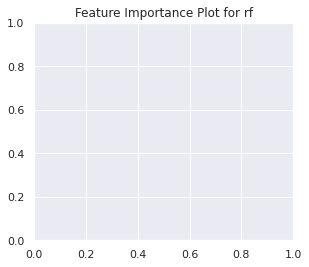

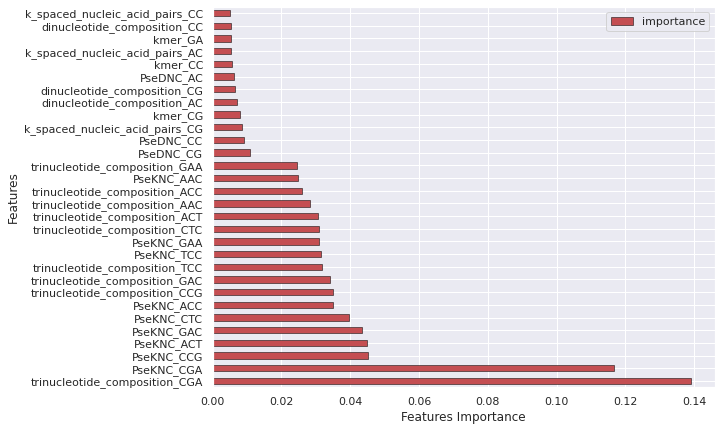

<Figure size 432x288 with 0 Axes>

In [40]:
ml.features_importances_plot(
    classifier=best_rf_model, 
    top_features=30, 
    model_name='rf',
    show=True, 
    path_save=None
)

Let's try now using SVM.

In [41]:
ml = ShallowML(X_train, X_test, y_train, y_test, report_name=None, columns_names=fps_x.columns)

param_grid = {'clf__C':[10], 'clf__gamma':[0.001], 'clf__kernel':['rbf']}

best_svm_model = ml.train_best_model(
    model_name=None,
    model='svm',
    score=make_scorer(matthews_corrcoef),
    param_grid=param_grid,
)

performing gridSearch...
GridSearchCV took 0.26 seconds for 1 candidate parameter settings.
GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', None),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=10,
             param_grid={'clf__C': [10], 'clf__gamma': [0.001],
                         'clf__kernel': ['rbf']},
             scoring=make_scorer(matthews_corrcoef))
Model with rank: 1
 Mean validation score: 0.947 (std: 0.031)
 Parameters: {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
 

make_scorer(matthews_corrcoef)
10
Best score (scorer: make_scorer(matthews_corrcoef)) and parameters from a 10-fold cross validation:
 MCC score:	0.947
 Parameters:	{'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}

0.947444 (0.031038) with: {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
   clf__C  clf__gamma clf__kernel     means      stds
0      10       0.001         rbf  0.947444  0.031038


In [42]:
scores, report, cm, cm2 = ml.score_testset(best_svm_model)
print(report)
print(cm)  
scores

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       253
           1       0.95      0.99      0.97       247

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

[[240  13]
 [  2 245]]


{'Accuracy': 0.97,
 'MCC': 0.9409335963558716,
 'f1 score': 0.9702970297029703,
 'roc_auc': 0.9702597173993056,
 'Precision': array([0.494    , 0.9496124, 1.       ]),
 'Recall': array([1.        , 0.99190283, 0.        ]),
 'fdr': 0.050387596899224806,
 'sn': 0.9919028340080972,
 'sp': 0.9486166007905138}

The SVM feature importance can only be calculated if the best model has a linear kernel. Since the best model has the RBF kernel, we can't calculate the feature importance, so we will use the linear_svm model instead.

In [43]:
ml = ShallowML(X_train, X_test, y_train, y_test, report_name=None, columns_names=fps_x.columns)

best_linear_svm_model = ml.train_best_model(
    model_name=None,
    model='linear_svm',                               
    score=make_scorer(matthews_corrcoef),
    param_grid=None
)

performing gridSearch...


/home/jna/miniconda3/envs/dna-conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/jna/miniconda3/envs/dna-conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/jna/miniconda3/envs/dna-conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/jna/miniconda3/envs/dna-conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/jna/miniconda3/envs/dna-conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/jna/miniconda3/envs/dna-conda

GridSearchCV took 0.54 seconds for 4 candidate parameter settings.
GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', None),
                                       ('clf', LinearSVC(random_state=1))]),
             n_jobs=10, param_grid=[{'clf__C': [0.01, 0.1, 1.0, 10]}],
             scoring=make_scorer(matthews_corrcoef))
Model with rank: 1
 Mean validation score: 0.939 (std: 0.034)
 Parameters: {'clf__C': 0.01}
 

Model with rank: 2
 Mean validation score: 0.925 (std: 0.034)
 Parameters: {'clf__C': 0.1}
 

Model with rank: 3
 Mean validation score: 0.901 (std: 0.030)
 Parameters: {'clf__C': 10}
 

make_scorer(matthews_corrcoef)
10
Best score (scorer: make_scorer(matthews_corrcoef)) and parameters from a 10-fold cross validation:
 MCC score:	0.939
 Parameters:	{'clf__C': 0.01}

0.938593 (0.034471) with: {'clf__C': 0.01}
0.924875 (0.033539) with: {'clf__C': 0.1}
0.900478 (0.037374) with: {'clf__C': 1.0}
0.900520 (0.030071) with: {'clf__C': 10}
   clf__C     means      

/home/jna/miniconda3/envs/dna-conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/jna/miniconda3/envs/dna-conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [44]:
scores, report, cm, cm2 = ml.score_testset(best_linear_svm_model)
print(report)
print(cm)  
scores

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       253
           1       0.94      0.98      0.96       247

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

[[238  15]
 [  4 243]]


{'Accuracy': 0.962,
 'MCC': 0.92492424534427,
 'f1 score': 0.9623762376237623,
 'roc_auc': 0.9622585652333935,
 'Precision': array([0.494     , 0.94186047, 1.        ]),
 'Recall': array([1.        , 0.98380567, 0.        ]),
 'fdr': 0.05813953488372093,
 'sn': 0.9838056680161943,
 'sp': 0.9407114624505929}

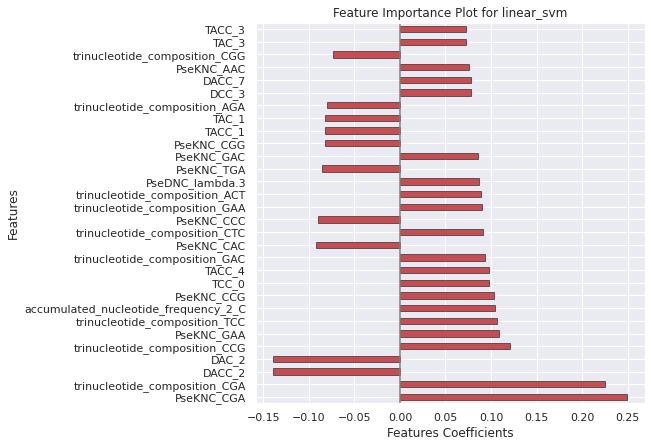

<Figure size 432x288 with 0 Axes>

In [45]:
ml.features_importances_plot(
    classifier=best_linear_svm_model, 
    model_name='linear_svm',
    column_to_plot=0,
    top_features=30, 
    show=True, 
    path_save=None
)

We've reached the end of the machine learning pipeline. As we could see, the implemented descriptors were used as features for all the models, obtaining great performances for all of them.